In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Intellipaat/Weekend_ML_Batch/Time_Series/AirPassengers.csv')

In [ ]:
#EDA on the time series data
data.head(20)

In [ ]:
data.shape

In [ ]:
data.tail()

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
data['Month'] = pd.to_datetime(data['Month'])
data.head()

In [ ]:
data.info()

In [ ]:
data.index = data['Month']
data.head()

In [ ]:
del data['Month']

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
#plotting the time series
data.plot()

In [ ]:
data.shape

In [ ]:
#seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(data['#Passengers'].dropna())

decompose_result.plot()

In [ ]:
mean_log = data.rolling(window=12).mean()

In [ ]:

plt.plot(data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean ')

Before building a time series model, we need to make sure that the time series is stationary. If the time series is non-stationary, then we need to make it stationary by differencing the data. The number of times we take a difference of the data is a parameter used in ARIMA models, which we will see shortly.

Non-stationarity in time series may appear for the following reasons:

Presence of a trend in the data
Presence of heteroskedasticity
Presence of autocorrelation
We can identify non-stationarity in the time series by performing a statistical test called the Augmented Dicky-Fuller Test.

Null Hypothesis: The time series is non stationary
Alternate Hypothesis: The time series is stationary

In [ ]:
# If p value less than 0.05 then time series is stationary

In [ ]:
#checking the stationarity of the series
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['#Passengers'])
print(result[1])

In [ ]:
data['#Passengers'].diff().dropna()

In [ ]:
data['#Passengers'].head(10)

In [ ]:
result = adfuller(data['#Passengers'].diff().dropna())
result[1]

In [ ]:
data['#Passengers'].diff().dropna().plot()

In [ ]:
new_data = pd.DataFrame(data['#Passengers'].diff().dropna())

In [ ]:
mean_log = new_data.rolling(window=12).mean()

In [ ]:

plt.plot(new_data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean ')

In [ ]:
new_data

If p value < 0.05 then time series is stationary else not stationary

In [ ]:
#adfuller test for stationarity
result = adfuller(new_data['#Passengers'])
print(result[1])

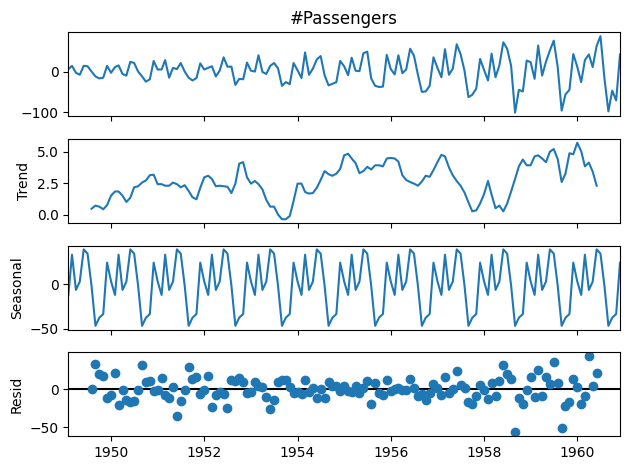

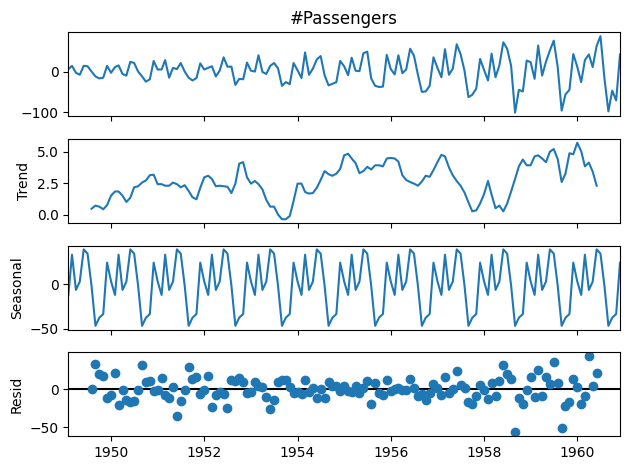

In [ ]:
#seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(new_data['#Passengers'].dropna())

decompose_result.plot()

In [ ]:
new_data

,#Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

train = new_data.iloc[:120]['#Passengers']
test = new_data.iloc[121:]['#Passengers']

model = ARIMA(train, order=(1,0,2)) #p=1,d=0,q=2
model_fit = model.fit()
# model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
len(train)+len(test)- 1

141

In [ ]:
new_data['predict'] = model_fit.predict(start= 2,
                                    end=len(train)+len(test)- 1,
                                    dynamic=True)
new_data[['#Passengers','predict']]

,#Passengers,predict
Month,,
1949-02-01,6.0,NaN
1949-03-01,14.0,NaN
1949-04-01,-3.0,3.881773
1949-05-01,-8.0,-1.389262
1949-06-01,14.0,0.415301
...,...,...
1960-08-01,-16.0,2.446863
1960-09-01,-98.0,2.446863
1960-10-01,-47.0,2.446863


<Axes: xlabel='Month'>

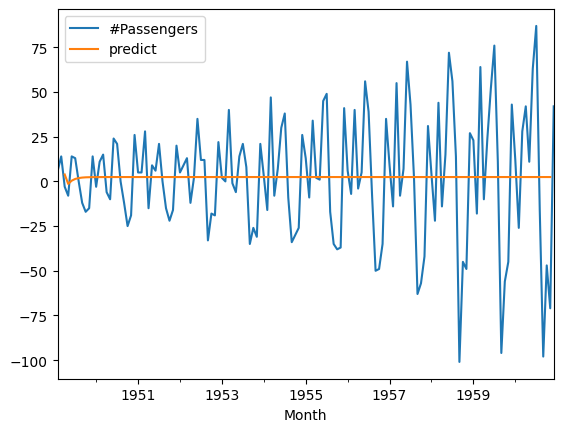

In [ ]:
new_data[['#Passengers','predict']].plot()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(1,0,2), seasonal_order=(1,0,2,12))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [ ]:
train['predict'] = model.predict(start= 2 ,
                                                       end=len(train)+len(test)- 1,
                                                       dynamic=True)

<ipython-input-37-a60fcfc2a70f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['predict'] = model.predict(start= 2 ,


<Axes: xlabel='Month'>

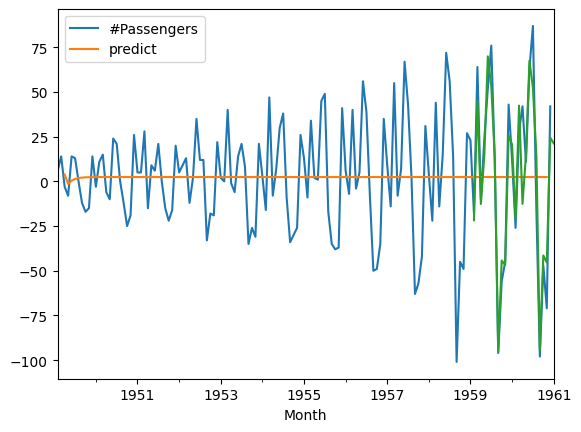

In [ ]:
#predicting the projections for the next 5 years
forecast = model.forecast(steps=24)
new_data.plot()
forecast.plot()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
predict_df = new_data[121:141]
mean_squared_error(predict_df['#Passengers'],predict_df['predict'])


2811.6194677814156

In [ ]:
mean_absolute_percentage_error(predict_df['#Passengers'],predict_df['predict'])

0.9777285915976563

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

train = data.iloc[:120]['#Passengers']
test = data.iloc[121:]['#Passengers']

from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(1,1,2), seasonal_order=(1,1,2,12))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: xlabel='Month'>

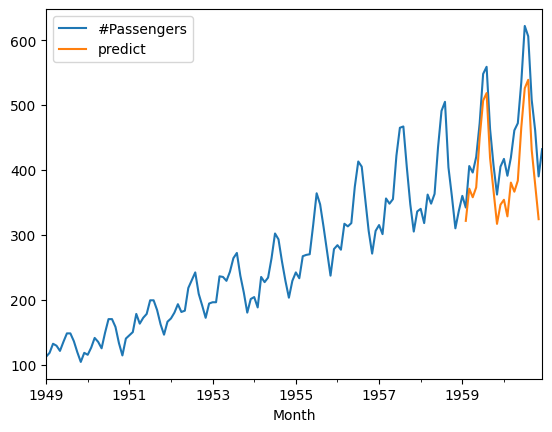

In [ ]:
data['predict'] = model.predict(start= 121 ,
                                                       end=len(train)+len(test)- 1,
                                                       dynamic=True)
data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

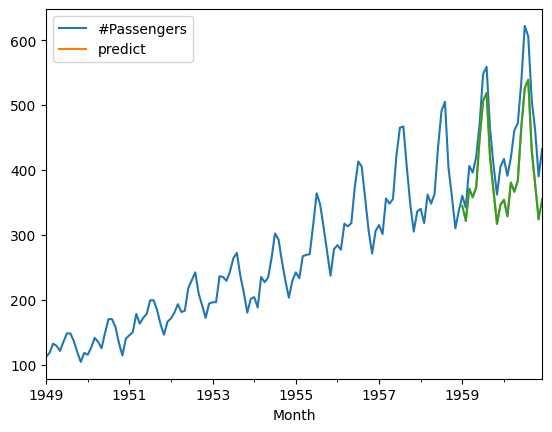

In [ ]:
#predicting the projections for the next 5 years
forecast = model.forecast(steps=24)
data.plot()
forecast.plot()